<a href="https://colab.research.google.com/github/shloak17107/airline-delay-prediction/blob/main/Vatsal_Copy_of_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install aiohttp aiofiles tqdm nest_asyncio

### DATASET DOWNLOADING LINKS

In [ ]:
# On-time Performance data for each month of 2024
dataset_links = [
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_1.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_2.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_3.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_4.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_5.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_6.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_7.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_8.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_9.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_10.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_11.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_12.zip"
]

### IMPORTING LIBRARIES

In [ ]:
import aiohttp
import asyncio
import zipfile
import os
from tqdm.asyncio import tqdm
import aiofiles
import nest_asyncio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### CODE FOR DOWNLOADING THE DATASET

In [ ]:
# Enable nested event loops
nest_asyncio.apply()

async def download_file(session, url, filename):
    async with session.get(url) as response:
        if response.status == 200:
            async with aiofiles.open(filename, mode='wb') as f:
                await f.write(await response.read())
            return True
    return False

async def process_file(session, link):
    filename = os.path.join('data', os.path.basename(link))
    csv_name = filename.replace('.zip', '.csv')

    if os.path.exists(csv_name):
        return f'Skipping {filename} - CSV already exists'

    try:
        # Download file
        success = await download_file(session, link, filename)
        if not success:
            return f'Failed to download {filename}'

        tqdm.write(f'Downloaded {filename}')

        # Unzip file
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('data')

        # Remove zip file
        os.remove(filename)
        return f'Extracted {filename}'

    except Exception as e:
        return f'Error processing {filename}: {str(e)}'

async def main(links):
    os.makedirs('data', exist_ok=True)

    async with aiohttp.ClientSession() as session:
        tasks = [process_file(session, link) for link in links]
        results = []
        for result in tqdm(asyncio.as_completed(tasks), total=len(tasks)):
            results.append(await result)
            tqdm.write(results[-1])

# Run the async code using asyncio.run()
asyncio.run(main(dataset_links))

  0%|          | 0/12 [00:11<?, ?it/s]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_9.zip


  8%|▊         | 1/12 [00:12<02:14, 12.20s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_9.zip
Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_10.zip


 17%|█▋        | 2/12 [00:13<00:56,  5.62s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_10.zip


 17%|█▋        | 2/12 [00:13<00:56,  5.62s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_3.zip


 25%|██▌       | 3/12 [00:14<00:34,  3.79s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_3.zip
Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_2.zip


 33%|███▎      | 4/12 [00:15<00:21,  2.64s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_2.zip


 33%|███▎      | 4/12 [00:16<00:21,  2.64s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_5.zip


 42%|████▏     | 5/12 [00:17<00:15,  2.27s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_5.zip


 42%|████▏     | 5/12 [00:18<00:15,  2.27s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_11.zip


 50%|█████     | 6/12 [00:18<00:12,  2.05s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_11.zip


 50%|█████     | 6/12 [00:19<00:12,  2.05s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_1.zip


 58%|█████▊    | 7/12 [00:20<00:09,  1.85s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_1.zip
Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_4.zip


 67%|██████▋   | 8/12 [00:21<00:06,  1.57s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_4.zip


 67%|██████▋   | 8/12 [00:22<00:06,  1.57s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_6.zip


 75%|███████▌  | 9/12 [00:23<00:04,  1.60s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_6.zip


 75%|███████▌  | 9/12 [00:23<00:04,  1.60s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_12.zip


 83%|████████▎ | 10/12 [00:24<00:03,  1.58s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_12.zip
Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_8.zip


 92%|█████████▏| 11/12 [00:25<00:01,  1.45s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_8.zip


 92%|█████████▏| 11/12 [00:28<00:01,  1.45s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_7.zip


100%|██████████| 12/12 [00:31<00:00,  2.63s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_7.zip


In [ ]:
# Get all CSV files in the data directory
csv_files = glob.glob('data/*.csv')

# Read and combine all CSV files
df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

# Print the size and first few rows
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows of the dataset:")
print(df.head())

<ipython-input-5-85bcb24f9df1>:5: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
<ipython-input-5-85bcb24f9df1>:5: DtypeWarning: Columns (76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
<ipython-input-5-85bcb24f9df1>:5: DtypeWarning: Columns (48,69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
<ipython-input-5-85bcb24f9df1>:5: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
<ipython-input-5-85bcb24f9df1>:5: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df =

Dataset shape: (7079061, 110)

First few rows of the dataset:
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2024        3      8           9          5  2024-08-09                AA   
1  2024        3      8          10          6  2024-08-10                AA   
2  2024        3      8          11          7  2024-08-11                AA   
3  2024        3      8          12          1  2024-08-12                AA   
4  2024        3      8          13          2  2024-08-13                AA   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     19805                          AA      N452AN  ...   
1                     19805                          AA      N407AN  ...   
2                     19805                          AA      N464AA  ...   
3                     19805                          AA      N408AN  ...   
4                     19805                          AA      N400AN  ...   



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079061 entries, 0 to 7079060
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(70), int64(19), object(21)
memory usage: 5.8+ GB


In [ ]:
print(df.columns.tolist())

['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FirstDepTime', 'TotalAddGTime'

In [ ]:
# Create list of columns which are useful for analysis and prediction
useful_columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Flight_Number_Reporting_Airline', 'Tail_Number', 'Origin', 'Dest', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'TaxiOut', 'DepartureDelayGroups', 'DepDelayMinutes', 'ArrTime', 'CRSArrTime', 'ArrDelay', 'TaxiIn', 'ArrivalDelayGroups', 'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Cancelled', 'CancellationCode', 'Diverted']

df = df[useful_columns]


In [ ]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
0,2024,8,9,5,2024-08-09,AA,478.0,N452AN,PHL,PHX,...,326.0,274.0,3.0,0.0,15.0,0.0,0.0,0.0,NaN,0.0
1,2024,8,10,6,2024-08-10,AA,478.0,N407AN,PHL,PHX,...,304.0,272.0,11.0,0.0,0.0,0.0,40.0,0.0,NaN,0.0
2,2024,8,11,7,2024-08-11,AA,478.0,N464AA,PHL,PHX,...,292.0,266.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
3,2024,8,12,1,2024-08-12,AA,478.0,N408AN,PHL,PHX,...,316.0,275.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
4,2024,8,13,2,2024-08-13,AA,478.0,N400AN,PHL,PHX,...,293.0,263.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0


In [ ]:
df['IsDelayed'] = (df['ArrDelay'] > 15).astype(int)

<ipython-input-10-08ac32c4065b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsDelayed'] = (df['ArrDelay'] > 15).astype(int)


In [ ]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted,IsDelayed
0,2024,8,9,5,2024-08-09,AA,478.0,N452AN,PHL,PHX,...,274.0,3.0,0.0,15.0,0.0,0.0,0.0,NaN,0.0,1
1,2024,8,10,6,2024-08-10,AA,478.0,N407AN,PHL,PHX,...,272.0,11.0,0.0,0.0,0.0,40.0,0.0,NaN,0.0,1
2,2024,8,11,7,2024-08-11,AA,478.0,N464AA,PHL,PHX,...,266.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0
3,2024,8,12,1,2024-08-12,AA,478.0,N408AN,PHL,PHX,...,275.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0
4,2024,8,13,2,2024-08-13,AA,478.0,N400AN,PHL,PHX,...,263.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0


In [ ]:
missing_percent = df.isnull().mean().round(4) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Missing value percentage by column:")
print(missing_percent)

Missing value percentage by column:
CancellationCode        98.64
CarrierDelay            79.52
LateAircraftDelay       79.52
WeatherDelay            79.52
SecurityDelay           79.52
NASDelay                79.52
AirTime                  1.61
ActualElapsedTime        1.61
ArrDelay                 1.61
ArrivalDelayGroups       1.61
ArrDelayMinutes          1.61
TaxiIn                   1.38
ArrTime                  1.38
TaxiOut                  1.35
DepTime                  1.31
DepartureDelayGroups     1.31
DepDelay                 1.31
DepDelayMinutes          1.31
Tail_Number              0.28
dtype: float64


### 🧹 Data Cleaning: Remove Delayed Flights with No Known Cause

Some flights are recorded as delayed (`ArrDelay > 0`) but do not list any specific reason under the delay cause columns (`CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`). These rows are incomplete and may affect analysis or model training.

We identified and removed these rows using the logic:

- `ArrDelay > 15`
- All delay cause columns are either `NaN` or `0`

This ensures that any delayed flight in the dataset has at least one contributing delay factor recorded.


In [ ]:
# Delay cause columns
delay_causes = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Identify delayed flights (based on your custom isDelayed flag) with no known cause
incomplete_delay_rows = df[
    (df['IsDelayed'] == 1) &
    (df[delay_causes].fillna(0).sum(axis=1) == 0)
]

# Show count
print(f"Flights delayed with no cause mentioned: {len(incomplete_delay_rows)}")

Flights delayed with no cause mentioned: 2


In [ ]:
df = df.drop(incomplete_delay_rows.index)

In [ ]:
# 1. Drop cancelled and diverted flights
df = df[(df['Cancelled'] == 0) & (df['Diverted'] == 0)]

# 2. Drop columns related to cancellation/diversion
df.drop(columns=['Cancelled', 'Diverted', 'CancellationCode'], inplace=True)

In [ ]:
missing_percent = df.isnull().mean().round(4) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Missing value percentage by column:")
print(missing_percent)

Missing value percentage by column:
CarrierDelay         79.18
WeatherDelay         79.18
NASDelay             79.18
SecurityDelay        79.18
LateAircraftDelay    79.18
dtype: float64


In [ ]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ArrDelayMinutes,CRSElapsedTime,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsDelayed
0,2024,8,9,5,2024-08-09,AA,478.0,N452AN,PHL,PHX,...,18.0,311.0,326.0,274.0,3.0,0.0,15.0,0.0,0.0,1
1,2024,8,10,6,2024-08-10,AA,478.0,N407AN,PHL,PHX,...,51.0,311.0,304.0,272.0,11.0,0.0,0.0,0.0,40.0,1
2,2024,8,11,7,2024-08-11,AA,478.0,N464AA,PHL,PHX,...,0.0,311.0,292.0,266.0,NaN,NaN,NaN,NaN,NaN,0
3,2024,8,12,1,2024-08-12,AA,478.0,N408AN,PHL,PHX,...,6.0,311.0,316.0,275.0,NaN,NaN,NaN,NaN,NaN,0
4,2024,8,13,2,2024-08-13,AA,478.0,N400AN,PHL,PHX,...,0.0,311.0,293.0,263.0,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6965245 entries, 0 to 7079060
Data columns (total 33 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Month                            int64  
 2   DayofMonth                       int64  
 3   DayOfWeek                        int64  
 4   FlightDate                       object 
 5   Reporting_Airline                object 
 6   Flight_Number_Reporting_Airline  float64
 7   Tail_Number                      object 
 8   Origin                           object 
 9   Dest                             object 
 10  Distance                         float64
 11  DistanceGroup                    int64  
 12  DepTime                          float64
 13  CRSDepTime                       int64  
 14  DepDelay                         float64
 15  TaxiOut                          float64
 16  DepartureDelayGroups             float64
 17  DepDelayMinut

In [ ]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (6965245, 33)


In [ ]:
leakage_cols = [
    'DepTime', 'DepDelay', 'DepDelayMinutes', 'TaxiOut',
    'ArrTime', 'ArrDelayMinutes', 'TaxiIn',
    'ActualElapsedTime', 'AirTime', 'CarrierDelay',
    'WeatherDelay', 'NASDelay', 'SecurityDelay',
    'LateAircraftDelay'
]

df = df.drop(columns=leakage_cols)


In [ ]:
sns.set(style="whitegrid")

# Extract Hour from Scheduled Departure Time
df['DepHour'] = df['CRSDepTime'].apply(lambda x: int(str(int(x)).zfill(4)[:2]))

# Flag: Weekend
df['IsWeekend'] = df['DayOfWeek'].isin([6, 7]).astype(int)

# Convert airline, origin, and dest to category
cat_cols = ['Reporting_Airline', 'Origin', 'Dest']
df[cat_cols] = df[cat_cols].astype('category')

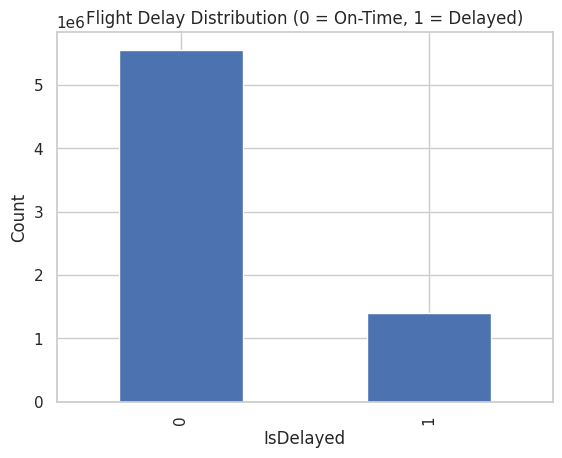

In [ ]:
df['IsDelayed'].value_counts().plot(kind='bar', title='Flight Delay Distribution (0 = On-Time, 1 = Delayed)')
plt.xlabel('IsDelayed')
plt.ylabel('Count')
plt.show()


<ipython-input-33-4892a57dfb7c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_rate_by_airline = df.groupby('Reporting_Airline')['IsDelayed'].mean().reset_index()
<ipython-input-33-4892a57dfb7c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_rate_by_airline, x='Reporting_Airline', y='IsDelayed', palette='Set2')


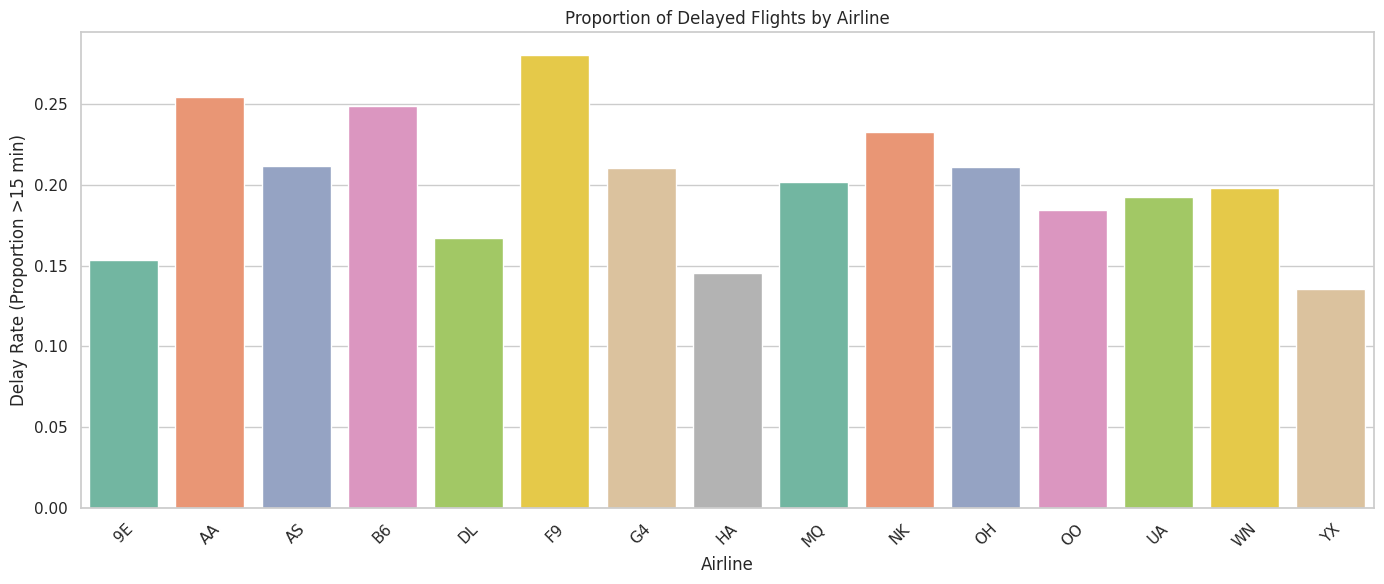

In [ ]:
# Group by airline and calculate average delay rate
delay_rate_by_airline = df.groupby('Reporting_Airline')['IsDelayed'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=delay_rate_by_airline, x='Reporting_Airline', y='IsDelayed', palette='Set2')

plt.title('Proportion of Delayed Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay Rate (Proportion >15 min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

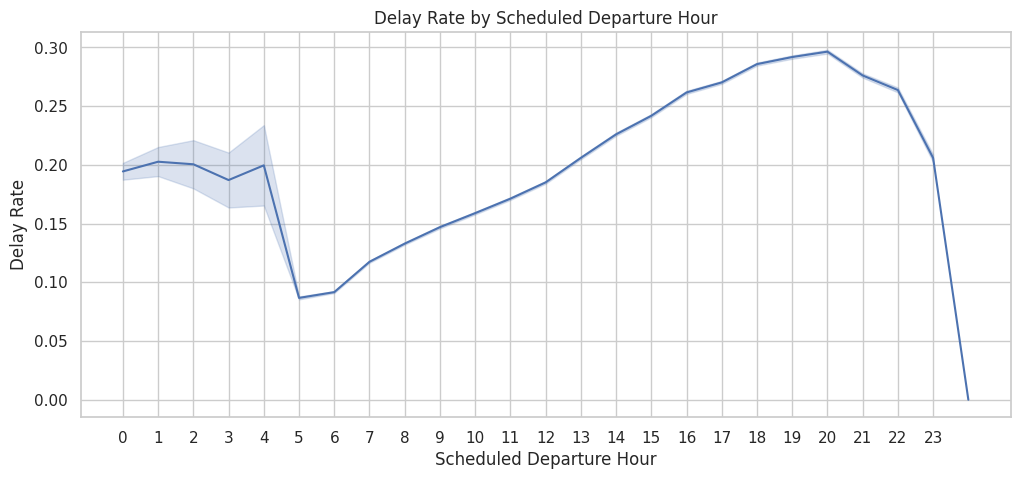

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='DepHour', y='IsDelayed', data=df)
plt.title('Delay Rate by Scheduled Departure Hour')
plt.ylabel('Delay Rate')
plt.xlabel('Scheduled Departure Hour')
plt.xticks(range(0, 24))
plt.show()

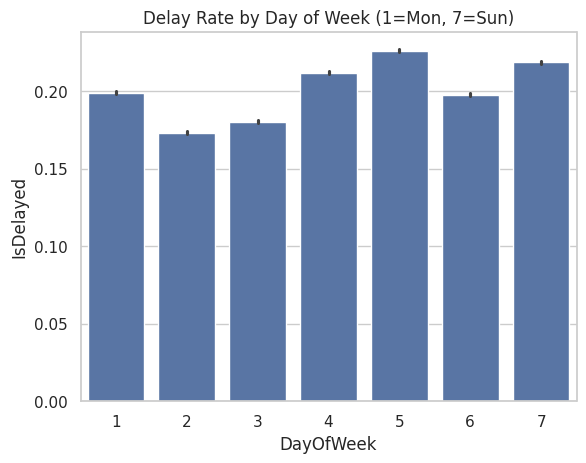

In [ ]:
sns.barplot(x='DayOfWeek', y='IsDelayed', data=df)
plt.title('Delay Rate by Day of Week (1=Mon, 7=Sun)')
plt.show()

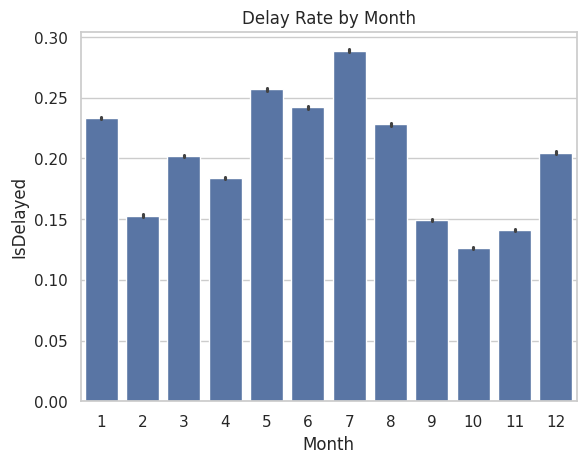

In [ ]:
sns.barplot(x='Month', y='IsDelayed', data=df)
plt.title('Delay Rate by Month')
plt.show()

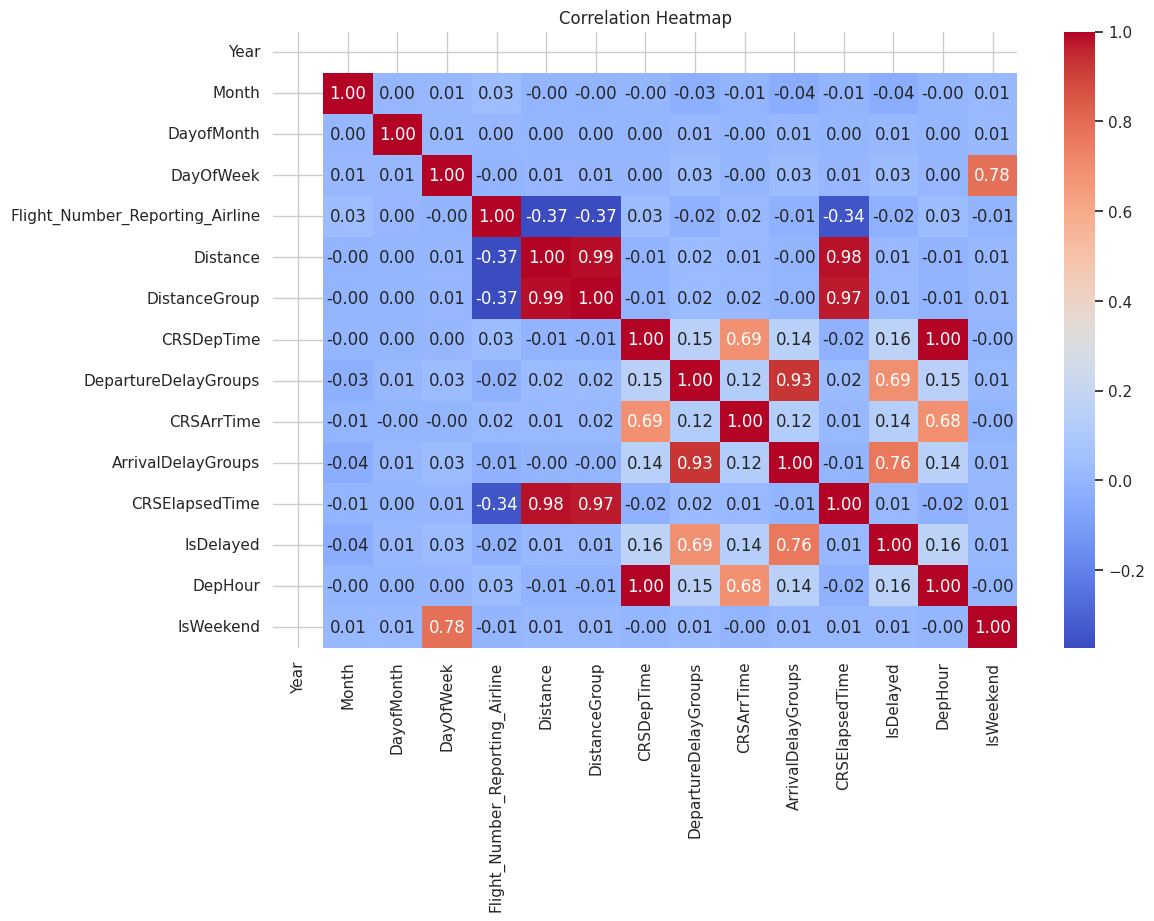

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

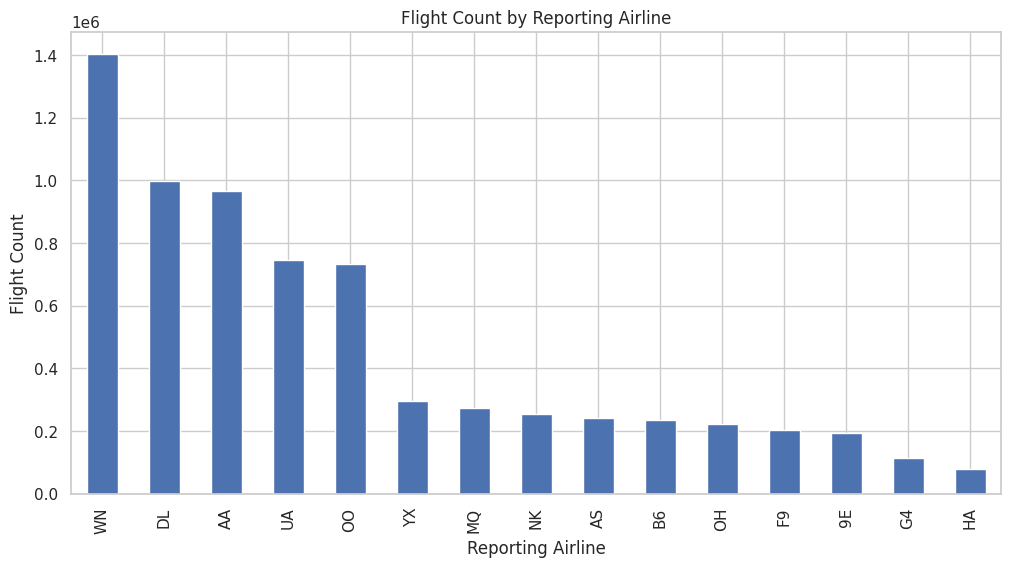

In [ ]:
plt.figure(figsize=(12, 6))
df["Reporting_Airline"].value_counts().plot(kind = 'bar')
plt.title("Flight Count by Reporting Airline")
plt.xlabel("Reporting Airline")
plt.ylabel("Flight Count")
plt.show()


<ipython-input-32-4892a57dfb7c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_rate_by_airline = df.groupby('Reporting_Airline')['IsDelayed'].mean().reset_index()
<ipython-input-32-4892a57dfb7c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_rate_by_airline, x='Reporting_Airline', y='IsDelayed', palette='Set2')


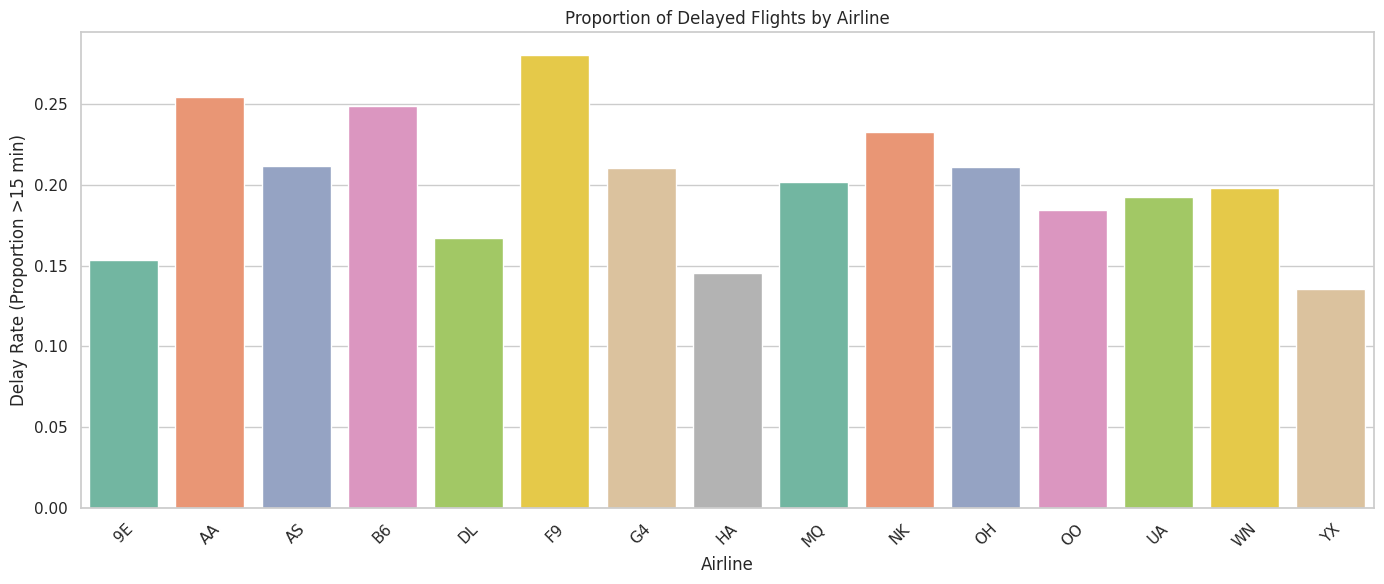

In [ ]:
# Group by airline and calculate average delay rate
delay_rate_by_airline = df.groupby('Reporting_Airline')['IsDelayed'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=delay_rate_by_airline, x='Reporting_Airline', y='IsDelayed', palette='Set2')

plt.title('Proportion of Delayed Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay Rate (Proportion >15 min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
features = [
    'Month', 'DayOfWeek', 'CRSDepTime', 'Distance',
    'DepHour', 'IsWeekend', 'Reporting_Airline', 'Origin', 'Dest'
]

target = 'IsDelayed'

In [ ]:
# Separate X and y
X = df[features]
y = df[target]

# Categorical and numeric columns
cat_cols = ['Reporting_Airline', 'Origin', 'Dest']
num_cols = ['Month', 'DayOfWeek', 'CRSDepTime', 'Distance', 'DepHour', 'IsWeekend']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Model pipeline
model = Pipeline([
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train
model.fit(X_train, y_train)

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
